# Assignment 2
An NOAA dataset has been stored in the file [fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv](Datasets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv). This comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data we got is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

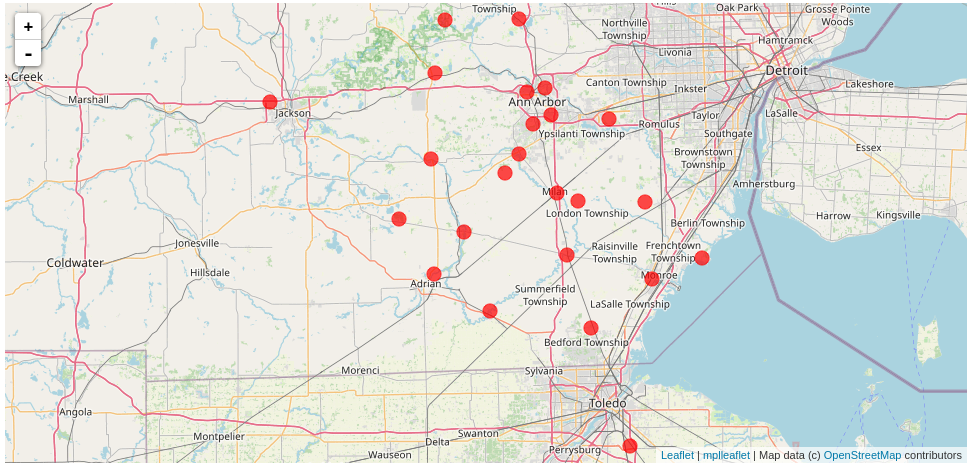

In [1]:
from PIL import Image
from IPython.display import display
import numpy as np

import warnings
warnings.filterwarnings('ignore')

im = Image.open('./Datasets/data_map.png')
display(im)

In [2]:
# let's bring in the libraries we need
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

# define some variables related to files
binsize = 400
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'

We must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

In [3]:
# read the datafiles
df = pd.read_csv('./Datasets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
# how many instances and feature
df.shape

(165085, 4)

In [5]:
# how many instances are null by column
df.isna().sum()

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [6]:
# how many values are null by row
df.isna().sum(axis = 1)

0         0
1         0
2         0
3         0
4         0
         ..
165080    0
165081    0
165082    0
165083    0
165084    0
Length: 165085, dtype: int64

In [7]:
df = df.sort_values(['Date'], ascending=True)
df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [8]:
df.tail()

,ID,Date,Element,Data_Value
45691,USC00200032,2015-12-31,TMAX,11
10573,USC00205050,2015-12-31,TMIN,-17
21088,USC00208202,2015-12-31,TMAX,0
10253,USC00201250,2015-12-31,TMIN,-6
29410,USC00200230,2015-12-31,TMIN,-17


In [9]:
# we divide on 10 because temperatures are in tenth of degrees C
df['Data_Value'] = df['Data_Value']/10

# so he have to apart data from 2015 and we gonna work with data from DETROIT WILLOW RUN AP
# which ID is USW00014853
df_2015 = df[(df['Date'] >= '2015-01-01') & (df.ID == 'USW00014853')]
df = df[(df['Date'] < '2015-01-01') & (df.ID == 'USW00014853')]
df.head()

,ID,Date,Element,Data_Value
18049,USW00014853,2005-01-01,TMAX,5.6
18066,USW00014853,2005-01-01,TMIN,-3.9
148905,USW00014853,2005-01-02,TMAX,11.7
148875,USW00014853,2005-01-02,TMIN,0.0
76143,USW00014853,2005-01-03,TMAX,3.9


In [10]:
df.shape

(7281, 4)

In [11]:
# so we get data over the period 2005-2014
df.drop(columns=['ID'], inplace=True)
df.tail()

,Date,Element,Data_Value
58692,2014-12-29,TMAX,2.2
63207,2014-12-30,TMAX,-2.1
63206,2014-12-30,TMIN,-8.2
62752,2014-12-31,TMIN,-8.8
62753,2014-12-31,TMAX,-3.2


In [12]:
# now we remove date of February 29th
df = df[(df.Date != '2008-02-29') & (df.Date != '2012-02-29')]
df.shape

(7277, 3)

In [13]:
# now we remove year on data to group by month's day
df['Date'] = df['Date'].replace('(\d{4}\-)','', regex=True)
df.head()

,Date,Element,Data_Value
18049,01-01,TMAX,5.6
18066,01-01,TMIN,-3.9
148905,01-02,TMAX,11.7
148875,01-02,TMIN,0.0
76143,01-03,TMAX,3.9


In [14]:
# let's gather data of temperature in diferences tables
TMAX = df[df.Element == 'TMAX']
TMAX.drop(columns=['Element'], inplace=True)

TMIN = df[df.Element == 'TMIN']
TMIN.drop(columns=['Element'], inplace=True)

# now we gonna group by Date and finally we take the min value for TMIN and max value for TMAX
TMAX = TMAX[['Date', 'Data_Value']].groupby(['Date']).max()
TMIN = TMIN[['Date', 'Data_Value']].groupby(['Date']).min()
TMAX.reset_index(inplace=True)
TMIN.reset_index(inplace=True)
print(len(TMAX), len(TMIN))

365 365


In [15]:
# now let's gather data from low and high temperatures
low_T = TMIN['Data_Value'].values
date_low = TMIN['Date'].values
print(len(low_T))
print(len(date_low))

365
365


In [16]:
# we divide on 10 because temperatures are in tenth of degrees C
high_T = TMAX['Data_Value'].values
date_high = TMAX['Date'].values
print(len(high_T))
print(len(date_high))

365
365


In [17]:
# The last step is to get date from 2015 that breaks temperature records of the period 2005-2014
df_2015.shape

(730, 4)

In [18]:
df_2015.drop(columns=['ID'], inplace=True)
df_2015['Date'] = df_2015['Date'].replace('(\d{4}\-)','', regex=True)
df_2015.head()

,Date,Element,Data_Value
43383,01-01,TMAX,1.1
43337,01-01,TMIN,-7.1
53707,01-02,TMIN,-3.2
53706,01-02,TMAX,3.9
50074,01-03,TMAX,2.8


In [19]:
# As well as previously we gather temperature data in different tables
TMAX_2015 = df_2015[df_2015.Element == 'TMAX']
TMAX_2015.drop(columns=['Element'], inplace=True)

TMIN_2015 = df_2015[df_2015.Element == 'TMIN']
TMIN_2015.drop(columns=['Element'], inplace=True)

In [20]:
low_2015 = TMIN_2015.Data_Value.values
high_2015 = TMAX_2015.Data_Value.values
print(len(low_2015), len(high_2015))

365 365


In [21]:
# this gonna be the mask for the 2015's breaking records
record_h = np.greater(high_2015, high_T)
record_l = np.less(low_2015, low_T)

In [22]:
# now let's know which data breaks records
date_h = df_2015[df_2015.Element == 'TMAX'].Date.values[record_h]
date_l = df_2015[df_2015.Element == 'TMIN'].Date.values[record_l]
Record_h = df_2015[df_2015.Element == 'TMAX'].Data_Value.values[record_h]
Record_l = df_2015[df_2015.Element == 'TMIN'].Data_Value.values[record_l]
print(len(date_h), len(Record_h))
print(len(date_l), len(Record_l))

53 53
17 17


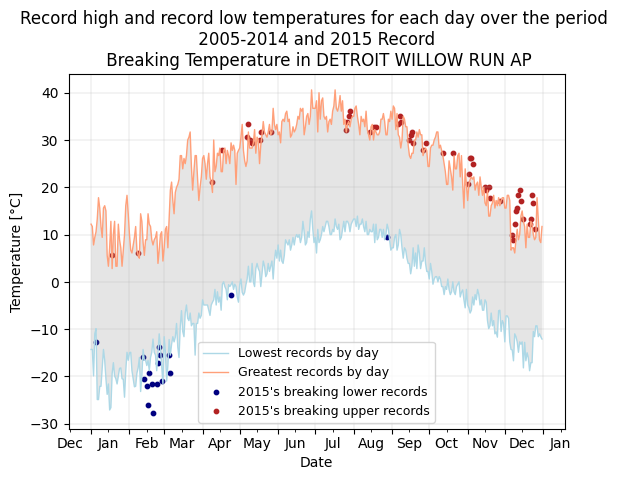

In [28]:
# now we can plot the data
plt.figure()
plt.grid(linewidth=0.2)
# first we plot line data (2005-2014 period)
plt.plot(date_low, low_T, color='lightblue', linewidth=1)
plt.plot(date_high, high_T, color='lightsalmon', linewidth=1)
# then the breaking records
plt.scatter(date_l, Record_l, color = 'navy', s=10)
plt.scatter(date_h, Record_h, color = 'firebrick', s=10)
# 'Lowest records by day', 'Greatest records by day', "2015's breaking lower records", "2015's breaking upper records"
plt.legend(['Lowest records by day', 'Greatest records by day', "2015's breaking lower records", "2015's breaking upper records"], prop={'size': 9})

# let's shape area between low and high plot
plt.gca().fill_between(range(len(date_high)),
                       low_T, high_T,
                       facecolor = 'gray',
                       alpha = 0.2)
# here we remove default x-axis and replace by the months
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))

ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')
ax.set_title('Record high and record low temperatures for each day over the period \n 2005-2014 and 2015 Record \n Breaking Temperature in DETROIT WILLOW RUN AP')

plt.subplots_adjust(top = 0.85)
# and finally we save and plot
plt.savefig("record_temperatures.jpg")
plt.show()